In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import pearsonr
import numpy.random as rnd
from scipy import stats

# DATA 102 Final Project Fall 2021
#### Group members: Alisha Mirapuri, Coco Sun, Nameera Faisal Akhtar, Riya Berry

Question 1: (Causal Inference): Does living in states with higher air pollution levels cause an increase in asthma mortality rates?

Question 2: (Comparing GLMs and nonparametric methods): How well does race predict risk for asthma mortality?

## EDA

In [2]:
asthma = pd.read_csv("U.S._Chronic_Disease_Indicators__Asthma.csv")
pollution = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv")

### EDA for asthma mortality rates by state

In [3]:
# Exploring what kind of questions exist in our asthma dataset, and how we can use these questions to get asthma mortality rate.
asthma['Question'].unique()

array(['Asthma mortality rate',
       'Emergency department visit rate for asthma',
       'Hospitalizations for asthma',
       'Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [4]:
# Only looking at those data entries which answer the question of asthma mortality rate, and those that actually have a value.
# Only looking at the age-adjusted rate as this removes the confounding effect of the age variable. 
location = asthma[asthma['Question'] == "Asthma mortality rate"]
location = location[~location['DataValue'].isna()]
location = location[location['DataValueType'] == "Age-adjusted Rate"]
location

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
46,2017,2017,US,United States,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,59,AST,AST4_1,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
56,2014,2014,CA,California,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,6,AST,AST4_1,AGEADJRATE,RACE,API,NaN,NaN,NaN,NaN
76,2017,2017,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,9,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
79,2013,2013,KS,Kansas,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,20,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
80,2016,2016,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,1,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,2013,2013,MI,Michigan,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,26,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
9773,2013,2013,NY,New York,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,36,AST,AST4_1,AGEADJRATE,RACE,BLK,NaN,NaN,NaN,NaN
9775,2013,2013,NC,North Carolina,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,37,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
9798,2017,2017,NC,North Carolina,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Age-adjusted Rate,...,37,AST,AST4_1,AGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN


In [5]:
# Checking if location contains the states, as we think it should.
location['LocationDesc'].value_counts()

California        56
New York          48
Florida           48
Texas             48
New Jersey        41
Ohio              40
Michigan          40
Illinois          40
Georgia           40
Virginia          40
North Carolina    40
Maryland          40
Pennsylvania      40
Tennessee         39
South Carolina    38
Alabama           36
Missouri          35
Arizona           34
Mississippi       34
Indiana           33
Wisconsin         32
Washington        32
Minnesota         30
Massachusetts     30
Louisiana         29
Oregon            27
Oklahoma          27
Colorado          26
Iowa              24
Connecticut       23
Kentucky          22
Utah              21
Nebraska          20
Arkansas          19
Kansas            18
Idaho             12
West Virginia     12
Nevada             9
United States      8
New Mexico         8
Hawaii             4
South Dakota       1
Name: LocationDesc, dtype: int64

In [6]:
# One of the locations is "United States", which we want to get rid of since we're looking at mortality rates by state. 
location = location[location['LocationDesc'] != "United States"]

In [7]:
# Look at average age-adjusted asthma mortality rates by state.
location = location[['LocationDesc', 'DataValue']]
location = location.groupby('LocationDesc').mean()
location = location.reset_index()
location = location.sort_values(by='DataValue')

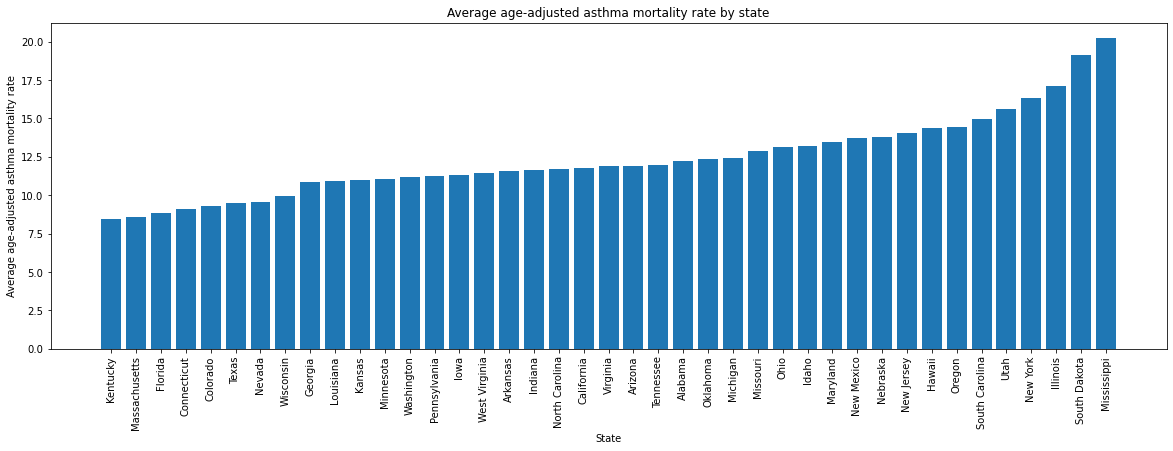

In [8]:
# Plotting
plt.figure(figsize=(20, 6))
plt.bar(location['LocationDesc'], location['DataValue'])
plt.xticks(location['LocationDesc'], rotation='vertical');
plt.xlabel("State");
plt.ylabel("Average age-adjusted asthma mortality rate");
plt.title("Average age-adjusted asthma mortality rate by state");

**Written analysis included in report.**

### EDA for asthma mortality rates by race

In [9]:
# Only looking at those data entries which answer the question of asthma mortality rate, and those that actually have a value.
# Only looking at the age-adjusted rate as this removes the confounding effect of the age variable. 
# Only looking at the stratification category of race. 
# Grouping by race, getting the mean of each race. 
race = asthma[asthma['StratificationCategoryID1'] == 'RACE']
race = race[race['Question'] == "Asthma mortality rate"]
race = race[race['DataValueType'] == "Age-adjusted Rate"]
race = race[['StratificationID1', 'DataValue']]
race = race[~race['DataValue'].isna()]
race = race.groupby('StratificationID1').mean()
race = race.reset_index()

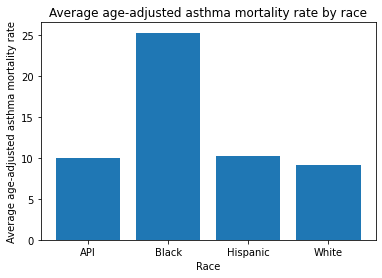

In [10]:
# Plotting
plt.bar(race['StratificationID1'], race['DataValue'])
plt.ylabel("Average age-adjusted asthma mortality rate") ;
plt.xlabel("Race");
plt.title("Average age-adjusted asthma mortality rate by race");
plt.xticks(race['StratificationID1'], ["API", "Black", "Hispanic", "White"], rotation='horizontal')
plt.show();

**Written analysis included in report.**

### EDA for asthma hospitalization rates versus race

In [11]:
# Only looking at those data entries which answer the question of asthma hospitalizations, and those that actually have a value.
# Only looking at the age-adjusted rate as this removes the confounding effect of the age variable. 
# Only looking at the stratification category of race. 
# Grouping by race, getting the mean of each race. 
race = asthma[asthma['StratificationCategoryID1'] == 'RACE']
race = race[race['Question'] == "Hospitalizations for asthma"]
race = race[race['DataValueType'] == "Age-adjusted Rate"]
race = race[['StratificationID1', 'DataValue']]
race = race[~race['DataValue'].isna()]
race = race.groupby('StratificationID1').mean()
race = race.reset_index()
race

,StratificationID1,DataValue
0,AIAN,9.614932
1,API,4.445682
2,BLK,19.566720
3,HIS,8.008559
4,WHT,5.806618


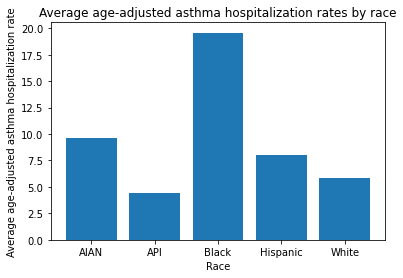

In [12]:
# Plotting
plt.bar(race['StratificationID1'], race['DataValue'])
plt.ylabel("Average age-adjusted asthma hospitalization rate") ;
plt.xlabel("Race");
plt.title("Average age-adjusted asthma hospitalization rates by race");
plt.xticks(race['StratificationID1'], ["AIAN", "API", "Black", "Hispanic", "White"], rotation='horizontal')
plt.show();

### EDA for asthma mortality rates versus pollution levels 

In [13]:
pollution_by_state = pollution[['statefips', 'ds_pm_pred']]

In [14]:
# Looking at mean estimated 24-hour average PM2.5 concentration by state.
pollution_by_state = pollution_by_state.groupby('statefips').mean() 
pollution_by_state = pollution_by_state.reset_index()
pollution_by_state['statefips'] = pollution_by_state['statefips'].astype(int)
pollution_by_state = pollution_by_state[~pollution_by_state['statefips'].isna()]
pollution_by_state

,statefips,ds_pm_pred
0,1,12.453149
1,4,6.576452
2,5,11.405171
3,6,11.179666
4,8,6.868177
5,9,7.644805
6,10,9.018218
7,11,10.604991
8,12,7.742284
9,13,11.365693


In [15]:
# Looking only at mean, non-null, age-adjusted, asthma mortality rates by state.
asthma_by_state = asthma[asthma['Question'] == "Asthma mortality rate"]
asthma_by_state = asthma_by_state[~asthma_by_state['DataValue'].isna()]
asthma_by_state = asthma_by_state[asthma_by_state['DataValueType'] == "Age-adjusted Rate"]
asthma_by_state = asthma_by_state[asthma_by_state['LocationDesc'] != "United States"]
asthma_by_state = asthma_by_state[['LocationID', 'DataValue']]
asthma_by_state = asthma_by_state.groupby('LocationID').mean()
asthma_by_state = asthma_by_state.reset_index()
asthma_by_state

,LocationID,DataValue
0,1,12.236111
1,4,11.923529
2,5,11.605263
3,6,11.746429
4,8,9.307692
5,9,9.100000
6,12,8.833333
7,13,10.880000
8,15,14.400000
9,16,13.200000


In [16]:
merged = pd.merge(asthma_by_state, pollution_by_state, how = 'inner', left_on = 'LocationID', right_on = 'statefips')

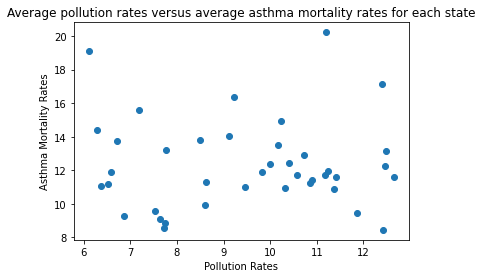

In [17]:
plt.scatter(merged['ds_pm_pred'], merged['DataValue'])
plt.xlabel("Pollution Rates")
ax = plt.ylabel("Asthma Mortality Rates") 
plt.title("Average pollution rates versus average asthma mortality rates for each state");

In [18]:
np.corrcoef(merged['ds_pm_pred'], merged['DataValue'])

array([[1.        , 0.00145923],
       [0.00145923, 1.        ]])

**Written analysis included in report.**

## Question 1 (Causal Inference): Does living in states with higher air pollution levels cause an increase in asthma mortality rates?


In [19]:
# Looking at mean estimated 24-hour average PM2.5 concentration by state.
pollution_by_state = pollution[['statefips', 'ds_pm_pred']]
pollution_by_state = pollution_by_state.groupby('statefips').mean() 
pollution_by_state = pollution_by_state.reset_index()
pollution_by_state['statefips'] = pollution_by_state['statefips'].astype(int)
pollution_by_state

,statefips,ds_pm_pred
0,1,12.453149
1,4,6.576452
2,5,11.405171
3,6,11.179666
4,8,6.868177
5,9,7.644805
6,10,9.018218
7,11,10.604991
8,12,7.742284
9,13,11.365693


In [20]:
# For each state, getting their corresponding mean asthma mortality rates, 
# and mean PM2.5 concentration.
merged = pd.merge(asthma_by_state, pollution_by_state, how = 'inner', left_on = 'LocationID', right_on = 'statefips')

In [21]:
# This is all states with their corresponding PM2.5 rates, and asthma mortality rates.
merged_all = merged
merged_all

,LocationID,DataValue,statefips,ds_pm_pred
0,1,12.236111,1,12.453149
1,4,11.923529,4,6.576452
2,5,11.605263,5,11.405171
3,6,11.746429,6,11.179666
4,8,9.307692,8,6.868177
5,9,9.100000,9,7.644805
6,12,8.833333,12,7.742284
7,13,10.880000,13,11.365693
8,16,13.200000,16,7.765538
9,17,17.125000,17,12.388659


In [22]:
# This is the most industrialized states (California, New Jersey, Texas, New York, Florida) with their corresponding PM2.5 rates, 
# and asthma mortality rates.
merged_some = merged[merged['LocationID'].isin([6, 12, 48, 36, 34])]
merged_some

,LocationID,DataValue,statefips,ds_pm_pred
3,6,11.746429,6,11.179666
6,12,8.833333,12,7.742284
23,34,14.019512,34,9.117607
25,36,16.350000,36,9.228158
34,48,9.466667,48,11.861321


In this part, we will set up our causal inference problem as follows. 

The state's average age-adjusted asthma mortality rate score is linear in the state's average PM2.5 concentration levels and the state's level of industrialization.

$Y = \beta_1 Z + \beta_2 X + \epsilon$

where, 

$Z$ = the state's average PM2.5 concentration levels, and

$Y$ =  the state's average asthma mortality rate.

The degree of industrialization/population of a state $X$ affects both $Z$ and $Y$, but is not observed. As a reuslt, we will estimate the causal effect by using plain linear regression (OLS) on the observed variables and $Y$. We will also use an intercept term. 

As a result, the equation we're solving for becomes:

$$\hat\beta_1, \hat c_1 = \arg\min_{\beta_1, c_1} \Vert Y - \beta_1Z - c_1 \Vert^2_2$$


In [23]:
# Using code from lab 7.

import statsmodels.api as sm

def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

In [24]:
# Fitting the model for all states
gammas_model_all = fit_OLS_model(merged_all, 'DataValue', 'ds_pm_pred', intercept=True);
print(gammas_model_all.summary());

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                 8.092e-05
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.993
Time:                        19:03:25   Log-Likelihood:                -95.364
No. Observations:                  40   AIC:                             194.7
Df Residuals:                      38   BIC:                             198.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3287      2.040      6.043      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In the last part, we talked about how the degree of industrialization/population of a state $X$ affects both $Z$ and $Y$, but is not observed. In this part, we will only use those states that have a comparable/similar degree of industrialization, in order to minimize this confounding effect. 

Let $\hat\beta_s$ and $\hat c_s$ be the parameters for this new model where the subscript $s$ denotes the fact that only **some** states are used in this model.

Here, the equation we're solving for becomes:

$\hat\beta_s, \hat c_s = \arg\min_{\beta_s, c_s} \Vert Y - \beta_sZ - c_s \Vert^2_2$

where, 

$Z$ = the state's average PM2.5 concentration levels.

$Y$ =  the state's average asthma mortality rate

like before.

In [25]:
# Fitting the model for some (most industrialized) states
gammas_model_some = fit_OLS_model(merged_some, 'DataValue', 'ds_pm_pred', intercept=True)
print(gammas_model_some.summary())

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.307
Method:                 Least Squares   F-statistic:                   0.05962
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.823
Time:                        19:03:25   Log-Likelihood:                -12.211
No. Observations:                   5   AIC:                             28.42
Df Residuals:                       3   BIC:                             27.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6610     10.679      1.373      0.2

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [26]:
print(gammas_model_all.params[1], gammas_model_all.params[0])

0.0018936472133398718 12.328733568284406


In [27]:
print(gammas_model_some.params[1], gammas_model_some.params[0])

-0.2623560729123282 14.66104830450967


As a result, we have:
    
$\hat\beta_1, \hat c_1 = 0.0018936472133398718, 12.328733568284406$
    
    
$\hat\beta_s, \hat c_s =  -0.2623560729123282, 14.66104830450967$

In [28]:
gammas_model_all.bse

const         2.040299
ds_pm_pred    0.210516
dtype: float64

In [29]:
gammas_model_some.bse

const         10.678931
ds_pm_pred     1.074458
dtype: float64

**Written analysis included in report.**

## Question 2 (Comparing GLMs and nonparametric methods): How well does race predict risk for asthma mortality?

In [30]:
race = asthma[asthma['StratificationCategoryID1'] == 'RACE']
race = race[race['Question'] == "Asthma mortality rate"]
race = race[~race['DataValue'].isna()]
race = race[race['DataValueType'] == 'Age-adjusted Rate']
race = race[['StratificationID1', 'DataValue']]
race = pd.get_dummies(race)
race

,DataValue,StratificationID1_API,StratificationID1_BLK,StratificationID1_HIS,StratificationID1_WHT
56,9.7,1,0,0,0
76,5.7,0,0,0,1
79,10.3,0,0,0,1
80,6.7,0,0,0,1
112,7.1,0,0,0,1
...,...,...,...,...,...
9744,19.2,0,0,1,0
9772,7.1,0,0,0,1
9773,34.4,0,1,0,0
9775,7.8,0,0,0,1


### Non-parametric method for Research Question 2

Here, we decided to use a decision tree model to predict risk of asthma mortality based on race.

In [31]:
# Performing the train-test split.
from sklearn.model_selection import train_test_split

train, test = train_test_split(race, test_size=0.30, random_state=102)
X_train = train.iloc[:, 1:]
y_train = train['DataValue']

In [32]:
# Fitting the model and using it to predict.
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(max_features=1).fit(X_train, y_train)

train["forest_pred"] = random_forest_model.predict(X_train) 
test["forest_pred"] = random_forest_model.predict(test.iloc[:, 1:]) 

/tmp/ipykernel_392/698277838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["forest_pred"] = random_forest_model.predict(X_train)
/tmp/ipykernel_392/698277838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["forest_pred"] = random_forest_model.predict(test.iloc[:, 1:])


In [33]:
# Evaluating the model.
train_rmse = np.mean((train["forest_pred"] - train["DataValue"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["DataValue"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

Training set error for random forest: 5.06019303437648
Test set error for random forest:     4.601109416245368


In [34]:
# Evaluating the model on the training set
random_forest_model.score(X_train, y_train)

0.6703969849829345

In [35]:
# Evaluating the model on the test set
X_test = test.iloc[:, 1:5]
y_test = test['DataValue']
random_forest_model.score(X_test, y_test)

0.746908930274781

In [36]:
pd.value_counts(test['forest_pred'])

9.128748     82
24.951027    43
11.456613    12
9.645222      3
Name: forest_pred, dtype: int64

### GLM for Research Question 2

In [37]:
# Fitting the GLM, and displaying summary.
import statsmodels.api as sm
gaussian_model = sm.GLM(
    train.DataValue, sm.add_constant(train.iloc[:, 1:5]),
    family=sm.families.Gaussian()
)
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              DataValue   No. Observations:                  326
Model:                            GLM   Df Residuals:                      322
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          25.932
Method:                          IRLS   Log-Likelihood:                -991.12
Date:                Mon, 13 Dec 2021   Deviance:                       8345.7
Time:                        19:03:26   Pearson chi2:                 8.35e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.01

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We will use bootstrapped Confidence Intervals to estimate uncertainty.

In [38]:
# For evaluating our model, we are using code from Lecture 12.
def bootstrap_xy(X, y, fnc, w=None, B=1000, plot=True):
    d = X.shape[1]
    N = X.shape[0]
    w_hat = fnc(X, y)
    w_boot = np.zeros(shape=(B,d))
    for b in range(B):
        bootstrap_indices = rnd.choice(np.arange(N), N)
        bootstrap_X = X.iloc[bootstrap_indices, :]
        bootstrap_y = y.iloc[bootstrap_indices]
        w_boot[b,:] = fnc(bootstrap_X, bootstrap_y)
    if plot:
        plt.scatter(w_boot[:,0], w_boot[:,1], c='b')
        plt.scatter(w_hat[0], w_hat[1], c='r', marker='x', s=300)
        if w:
            plt.scatter(w[0], w[1], c='g', marker='x', s=300)
        plt.show()
    return w_boot

def lin_model(x, y): 
    model = sm.GLM(
        y, x,
        family=sm.families.Gaussian()
    )
    results = model.fit()
    params = results.params
    
    return params

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


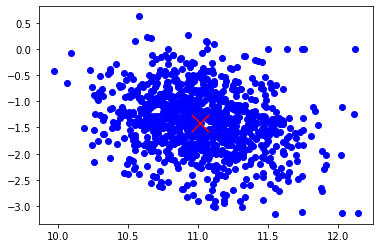

In [39]:
w_gaussian_boot = bootstrap_xy(sm.add_constant(train.iloc[:, 1:5]), train.DataValue, lin_model);

In [40]:
beta_0, beta_1, beta_2, beta_3, beta_4 = w_gaussian_boot.std(axis = 0)
print(f"Bootstrap std error for constant: {beta_0:.3f}")
print(f"Bootstrap std error for API individuals: {beta_1:.3f}")
print(f"Bootstrap std error for Black individuals: {beta_2:.3f}")
print(f"Bootstrap std error for Hispanic individuals: {beta_3:.3f}")
print(f"Bootstrap std error for White individuals: {beta_4:.3f}")

Bootstrap std error for constant: 0.343
Bootstrap std error for API individuals: 0.598
Bootstrap std error for Black individuals: 0.672
Bootstrap std error for Hispanic individuals: 1.166
Bootstrap std error for White individuals: 0.373


In [41]:
gaussian_table = pd.DataFrame(w_gaussian_boot, columns = ["Constant", "API", "Black", "Hispanic", "White"])
gaussian_table

,Constant,API,Black,Hispanic,White
0,10.704273,-0.654273,14.407545,-1.109829,-1.939169
1,11.363480,-1.396813,14.604288,0.100520,-1.944515
2,11.163439,-1.996773,13.598508,1.531561,-1.969856
3,10.980597,-2.020597,12.391366,2.571577,-1.961749
4,10.620586,-1.360586,13.911453,-0.331697,-1.598586
...,...,...,...,...,...
995,11.499239,-2.124239,13.009457,3.263261,-2.649239
996,11.071893,-0.871893,13.372551,0.275726,-1.704490
997,11.556859,-1.381859,13.281006,2.181237,-2.523525
998,11.020961,-1.770961,14.096933,0.683584,-1.988594


In [42]:
# 95% confidence interval for the constant
stats.norm.interval(0.95, loc=np.mean(gaussian_table["Constant"]), scale= np.std(gaussian_table["Constant"]))

(10.346926074409838, 11.690320691160823)

In [43]:
# 95% confidence interval for the API coefficient
stats.norm.interval(0.95, loc=np.mean(gaussian_table["API"]), scale= np.std(gaussian_table["API"]))

(-2.5721384935880436, -0.22828408640858822)

In [44]:
# 95% confidence interval for the Black coefficient
stats.norm.interval(0.95, loc=np.mean(gaussian_table["Black"]), scale= np.std(gaussian_table["Black"]))

(12.503099780224895, 15.138469855950566)

In [45]:
# 95% confidence interval for the Hispanic coefficient
stats.norm.interval(0.95, loc=np.mean(gaussian_table["Hispanic"]), scale= np.std(gaussian_table["Hispanic"]))

(-1.7982929912615835, 2.7723986603399866)

In [46]:
# 95% confidence interval for the White coefficient
stats.norm.interval(0.95, loc=np.mean(gaussian_table["White"]), scale= np.std(gaussian_table["White"]))

(-2.6201746704856292, -1.1578312892009555)